In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")

df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


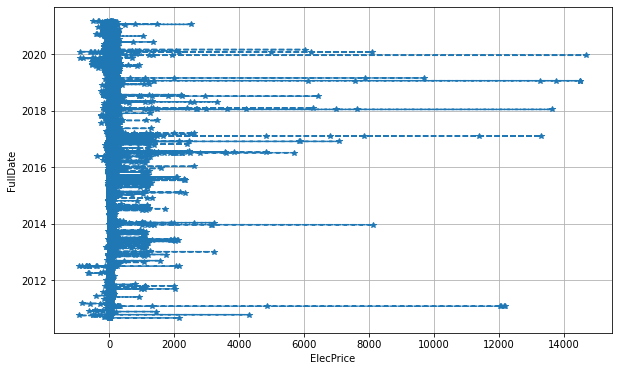

In [5]:
df[ "FullDate" ] = pd.to_datetime(df[ "FullDate" ]) #convert column to datetime
#df.set_index( "FullDate" , inplace= True )
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.ElecPrice, df.FullDate, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'ElecPrice' )
plt.ylabel( 'FullDate' )
df

In [8]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df[ 'SysLoad' ])

print(f'ADF Statistic: {adf_result[ 0 ]} ' )
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: -18.170675426414537 
p-value: 2.4474966090684217e-30 
No. of lags used: 67 
No. of observations used : 91948 
Critical Values:
 1% : -3.430421121531399 
 5% : -2.861571434572286 
 10% : -2.566786731528145 


In [9]:


adf_result = adfuller(df[ 'GasPrice' ])

print(f'ADF Statistic: {adf_result[ 0 ]} ' )
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: -6.793388065452674 
p-value: 2.3337605343635714e-09 
No. of lags used: 48 
No. of observations used : 91967 
Critical Values:
 1% : -3.430421106837576 
 5% : -2.86157142807793 
 10% : -2.566786728071412 


In [10]:
adf_result = adfuller(df[ 'ElecPrice' ])

print(f'ADF Statistic: {adf_result[ 0 ]} ' )
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' )

ADF Statistic: -31.952975699557868 
p-value: 0.0 
No. of lags used: 53 
No. of observations used : 91962 
Critical Values:
 1% : -3.430421110703783 
 5% : -2.8615714297867108 
 10% : -2.56678672898094 


In [11]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df, adf_result))

round(rmse, 3)

ValueError: Found input variables with inconsistent numbers of samples: [92016, 6]